In [1]:
import pandas as pd
import nltk
import re

In [2]:
data = pd.read_csv('IPhone-SE_Review.csv', engine='python')
data

,Num,Reviews
0,0,Great camera for pics and videos Battery life ...
1,1,Great device. Let me tell the Pros..1. Superb ...
2,2,"Who all loves older size i.e., 4.7 inch type s..."
3,3,This iPhone SE is the best phone ever you get....
4,4,This is my second iphone after iphone 4s. I?�v...
...,...,...
976,976,OkREAD MORE
977,977,Everything is perfect except batteryREAD MORE
978,978,Totally good but no facility of call recordREA...
979,979,Good ProductREAD MORE


In [3]:
doc = data['Reviews']
doc

0      Great camera for pics and videos Battery life ...
1      Great device. Let me tell the Pros..1. Superb ...
2      Who all loves older size i.e., 4.7 inch type s...
3      This iPhone SE is the best phone ever you get....
4      This is my second iphone after iphone 4s. I?�v...
                             ...                        
976                                          OkREAD MORE
977        Everything is perfect except batteryREAD MORE
978    Totally good but no facility of call recordREA...
979                                Good ProductREAD MORE
980    Delivered on time. If u are looking for compac...
Name: Reviews, Length: 981, dtype: object

In [4]:
# 텍스트 cleaning
def clean_text(text):
    
    pattern = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
    text = re.sub(pattern = pattern,repl = ' ',string = text) #한글삭제(인코딩 오류인지,,, 셿 이런 단어가 생기길래 삭제,,)
    
    pattern = '(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9]+.\[a-zA-Z0-9-.\]+)' # email제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = re.compile(r'([^\w]?\d+\.?\,?\)?\d*)+') # 숫자 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = '<[^>]*>' # html 태그 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = '[\r|\n]' # \r,\n 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern =  '[^\w\s]' # 특수기호 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)
    
    pattern = re.compile(r'\s+')  #  이중 space 제거
    text = re.sub(pattern = pattern,repl = ' ',string = text)

    text = text.lower()
    return text

In [5]:
doc = doc.apply(clean_text)
doc

0      great camera for pics and videos battery life ...
1      great device let me tell the pros superb build...
2      who all loves older size i e inch type should ...
3      this iphone se is the best phone ever you get ...
4      this is my second iphone after iphone s i ve b...
                             ...                        
976                                          okread more
977        everything is perfect except batteryread more
978    totally good but no facility of call recordrea...
979                                good productread more
980    delivered on time if u are looking for compact...
Name: Reviews, Length: 981, dtype: object

### 1. Tokenizing

In [8]:
wordpunct_tokenize_result = doc.apply(wordpunct_tokenize)

In [7]:
print(wordpunct_tokenize_result)

0      [great, camera, for, pics, and, videos, batter...
1      [great, device, let, me, tell, the, pros, supe...
2      [who, all, loves, older, size, i, e, inch, typ...
3      [this, iphone, se, is, the, best, phone, ever,...
4      [this, is, my, second, iphone, after, iphone, ...
                             ...                        
976                                       [okread, more]
977    [everything, is, perfect, except, batteryread,...
978    [totally, good, but, no, facility, of, call, r...
979                            [good, productread, more]
980    [delivered, on, time, if, u, are, looking, for...
Name: Reviews, Length: 981, dtype: object


### 2. POS tagging

In [12]:
pos_result = wordpunct_tokenize_result.apply(nltk.pos_tag)
print(pos_result)

0      [(great, JJ), (camera, NN), (for, IN), (pics, ...
1      [(great, JJ), (device, NN), (let, VB), (me, PR...
2      [(who, WP), (all, DT), (loves, VBZ), (older, J...
3      [(this, DT), (iphone, NN), (se, NN), (is, VBZ)...
4      [(this, DT), (is, VBZ), (my, PRP$), (second, J...
                             ...                        
976                          [(okread, RB), (more, RBR)]
977    [(everything, NN), (is, VBZ), (perfect, JJ), (...
978    [(totally, RB), (good, JJ), (but, CC), (no, DT...
979         [(good, JJ), (productread, NN), (more, RBR)]
980    [(delivered, VBN), (on, IN), (time, NN), (if, ...
Name: Reviews, Length: 981, dtype: object


### 3. Stopword 제거

In [15]:
import string
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer  = WordNetLemmatizer()
stopwords   = set(stopwords.words('english'))
punctuation = string.punctuation

In [16]:
def remove_stopwords(text):
    remove_sw = [w for w in text if w not in stopwords and w not in punctuation]
    return remove_sw

In [17]:
stopwords_removed = wordpunct_tokenize_result.apply(remove_stopwords)
stopwords_removed

0      [great, camera, pics, videos, battery, life, g...
1      [great, device, let, tell, pros, superb, build...
2      [loves, older, size, e, inch, type, definitely...
3      [iphone, se, best, phone, ever, get, beautiful...
4      [second, iphone, iphone, long, time, android, ...
                             ...                        
976                                             [okread]
977           [everything, perfect, except, batteryread]
978          [totally, good, facility, call, recordread]
979                                  [good, productread]
980    [delivered, time, u, looking, compact, budget,...
Name: Reviews, Length: 981, dtype: object

### 4. Stemming

In [18]:
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

In [19]:
def stemming(text):
    stemmed_text = [snowball.stem(t) for t in text]
    return stemmed_text

In [20]:
stem = stopwords_removed.apply(stemming)
stem

0      [great, camera, pic, video, batteri, life, goo...
1      [great, devic, let, tell, pros, superb, build,...
2      [love, older, size, e, inch, type, definit, go...
3      [iphon, se, best, phone, ever, get, beauti, de...
4      [second, iphon, iphon, long, time, android, us...
                             ...                        
976                                             [okread]
977              [everyth, perfect, except, batteryread]
978               [total, good, facil, call, recordread]
979                                  [good, productread]
980    [deliv, time, u, look, compact, budget, friend...
Name: Reviews, Length: 981, dtype: object

In [21]:
# 데이터프레임으로 예쁘게!!
df = pd.DataFrame({'Reviews' : doc, 'tokenize' : wordpunct_tokenize_result,
                  'pos_tag' : pos_result, 'remove_sw' : stopwords_removed,
                  'stemming' : stem})
df

,Reviews,tokenize,pos_tag,remove_sw,stemming
0,great camera for pics and videos battery life ...,"[great, camera, for, pics, and, videos, batter...","[(great, JJ), (camera, NN), (for, IN), (pics, ...","[great, camera, pics, videos, battery, life, g...","[great, camera, pic, video, batteri, life, goo..."
1,great device let me tell the pros superb build...,"[great, device, let, me, tell, the, pros, supe...","[(great, JJ), (device, NN), (let, VB), (me, PR...","[great, device, let, tell, pros, superb, build...","[great, devic, let, tell, pros, superb, build,..."
2,who all loves older size i e inch type should ...,"[who, all, loves, older, size, i, e, inch, typ...","[(who, WP), (all, DT), (loves, VBZ), (older, J...","[loves, older, size, e, inch, type, definitely...","[love, older, size, e, inch, type, definit, go..."
3,this iphone se is the best phone ever you get ...,"[this, iphone, se, is, the, best, phone, ever,...","[(this, DT), (iphone, NN), (se, NN), (is, VBZ)...","[iphone, se, best, phone, ever, get, beautiful...","[iphon, se, best, phone, ever, get, beauti, de..."
4,this is my second iphone after iphone s i ve b...,"[this, is, my, second, iphone, after, iphone, ...","[(this, DT), (is, VBZ), (my, PRP$), (second, J...","[second, iphone, iphone, long, time, android, ...","[second, iphon, iphon, long, time, android, us..."
...,...,...,...,...,...
976,okread more,"[okread, more]","[(okread, RB), (more, RBR)]",[okread],[okread]
977,everything is perfect except batteryread more,"[everything, is, perfect, except, batteryread,...","[(everything, NN), (is, VBZ), (perfect, JJ), (...","[everything, perfect, except, batteryread]","[everyth, perfect, except, batteryread]"
978,totally good but no facility of call recordrea...,"[totally, good, but, no, facility, of, call, r...","[(totally, RB), (good, JJ), (but, CC), (no, DT...","[totally, good, facility, call, recordread]","[total, good, facil, call, recordread]"
979,good productread more,"[good, productread, more]","[(good, JJ), (productread, NN), (more, RBR)]","[good, productread]","[good, productread]"


### 5. 빈도수 시각화

In [22]:
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [25]:
tokens = nltk.Text(flatten(stem))

In [27]:
# 빈도수 상위 50개
tokens.vocab().most_common(50)

[('phone', 845),
 ('read', 655),
 ('batteri', 624),
 ('iphon', 434),
 ('good', 427),
 ('camera', 359),
 ('use', 351),
 ('perform', 286),
 ('best', 221),
 ('appl', 202),
 ('day', 188),
 ('one', 182),
 ('great', 172),
 ('like', 158),
 ('product', 158),
 ('small', 151),
 ('buy', 150),
 ('size', 141),
 ('se', 137),
 ('screen', 135),
 ('fast', 128),
 ('charg', 127),
 ('awesom', 126),
 ('time', 123),
 ('qualiti', 122),
 ('get', 120),
 ('love', 117),
 ('android', 117),
 ('display', 116),
 ('go', 116),
 ('user', 115),
 ('price', 114),
 ('first', 108),
 ('life', 106),
 ('amaz', 102),
 ('also', 102),
 ('game', 100),
 ('look', 99),
 ('mobil', 95),
 ('last', 95),
 ('better', 94),
 ('compact', 88),
 ('want', 88),
 ('money', 86),
 ('power', 84),
 ('usag', 84),
 ('handi', 84),
 ('hour', 82),
 ('flipkart', 79),
 ('feel', 78)]

In [29]:
import matplotlib.pyplot as plt

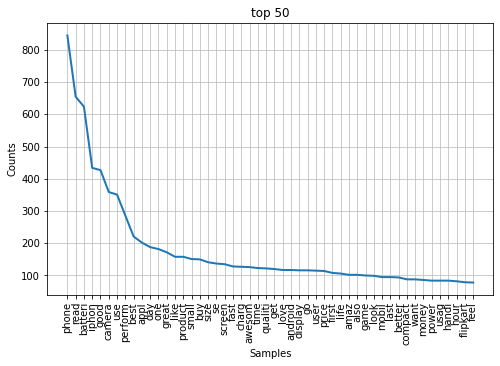

In [30]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('top 50')
tokens.plot(50)

### 명사 상위 50개 추출

In [31]:
def only_nouns(token_pos):
    nouns = []
    for word, pos in token_pos:
        if 'NN' in pos:
            nouns.append(word)
    return nouns

In [ ]:
nouns = pos_result.apply(only_nouns)
print(nouns)

In [ ]:
# 불용어 제거
stopwords_removed_nouns = nouns.apply(remove_stopwords)
stopwords_removed_nouns

In [ ]:
stem_nouns = stopwords_removed_nouns.apply(stemming)
stem_nouns

In [ ]:
# 데이터프레임으로 예쁘게!!
df_noun = pd.DataFrame({'Reviews' : doc, 'tokenize' : wordpunct_tokenize_result,
                  'pos_tag' : pos_result, 'nouns' : nouns, 'remove_sw' : stopwords_removed_nouns,
                  'stemming' : stem_nouns})
df_noun

In [ ]:
tokens_nouns = nltk.Text(flatten(stem_nouns))

In [ ]:
# 빈도수 상위 50개
tokens_nouns.vocab().most_common(50)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('top 50(only noun)')
tokens_nouns.plot(50)